# Practical 4: Aim: Working with stationary and non stationary timeseries

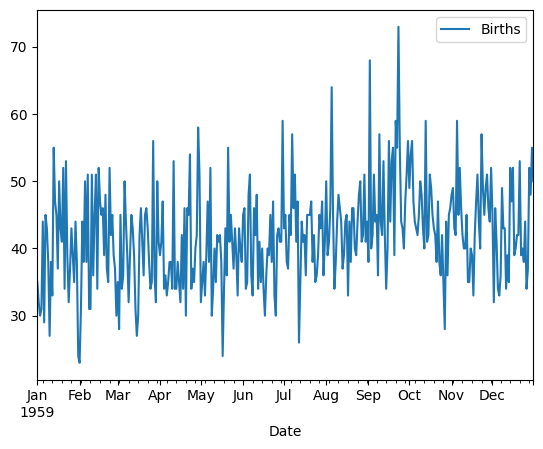

In [9]:
# load time series data
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True)
series.plot()
pyplot.show()


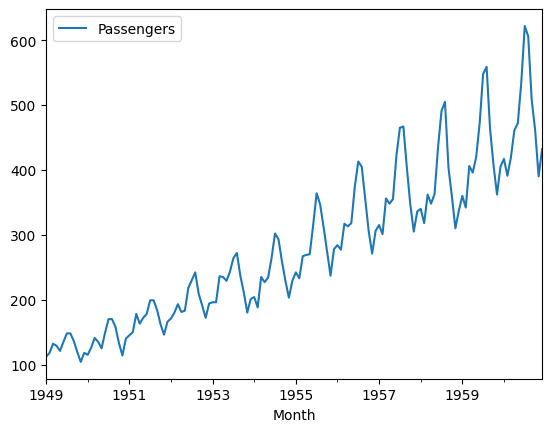

In [11]:
# load time series data
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('AirPassengers.csv', header=0, index_col=0, parse_dates=True)
series.plot()
pyplot.show()

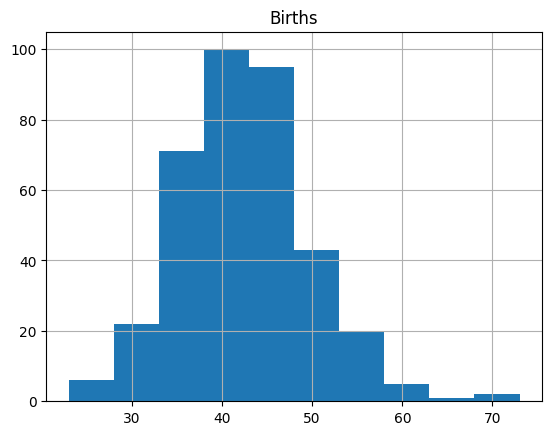

In [12]:
# plot a histogram of a time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True)
series.hist()
pyplot.show()


In [18]:
# calculate statistics of partitioned time series data
from pandas import read_csv
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True)

X = series.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


In [17]:
# calculate statistics of partitioned time series data
from pandas import read_csv
series = read_csv('AirPassengers.csv', header=0, index_col=0, parse_dates=True)
X = series.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))


mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


In [19]:
# calculate stationarity test of time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))


ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [20]:
#Importing the libraries:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
#Reading the airline-passengers data
data = pd.read_csv('AirPassengers.csv', index_col='Month')
#Checking for some values of the data.
data.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


Index(['Passengers'], dtype='object')


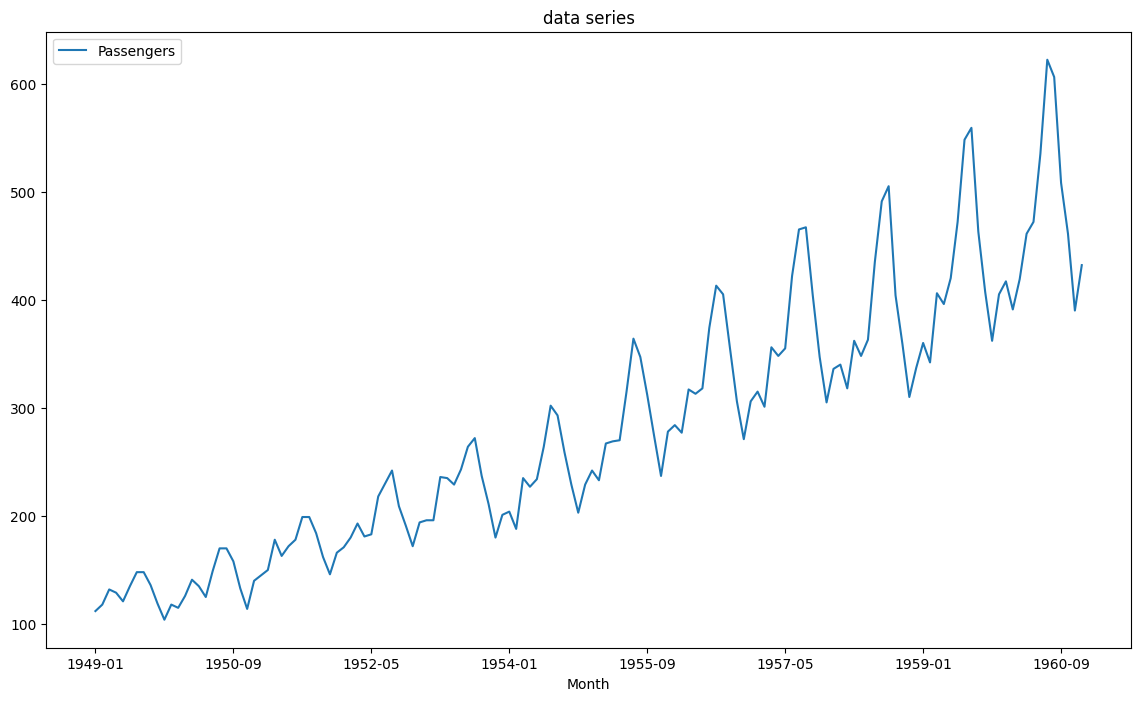

In [24]:
# Inspect column names
data.plot(figsize=(14,8), title='data series')
print(data.columns)
# Use the actual column name — here's a guess:
series = data['Passengers'].values


In [25]:
#Performing the ADF test on the series:

# ADF Test
result = adfuller(series, autolag='AIC')
#Extracting the values from the results:

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Failed to Reject Ho - Time Series is Non-Stationary


In [26]:
#Kwiatkowski Phillips Schmidt Shin (KPSS) test:

#Importing the libraries:

from statsmodels.tsa.stattools import kpss
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

result_kpss_ct=kpss(series,regression="ct")
print('Test Statistic: %f' %result_kpss_ct[0])
print('p-value: %f' %result_kpss_ct[1])
print('Critical values:')
for key, value in result_kpss_ct[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.096150
p-value: 0.100000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


In [28]:
path = 'daily-min-temperatures.csv'
data = pd.read_csv(path, index_col='Date')
data.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


<Axes: title={'center': 'temperature data series'}, xlabel='Date'>

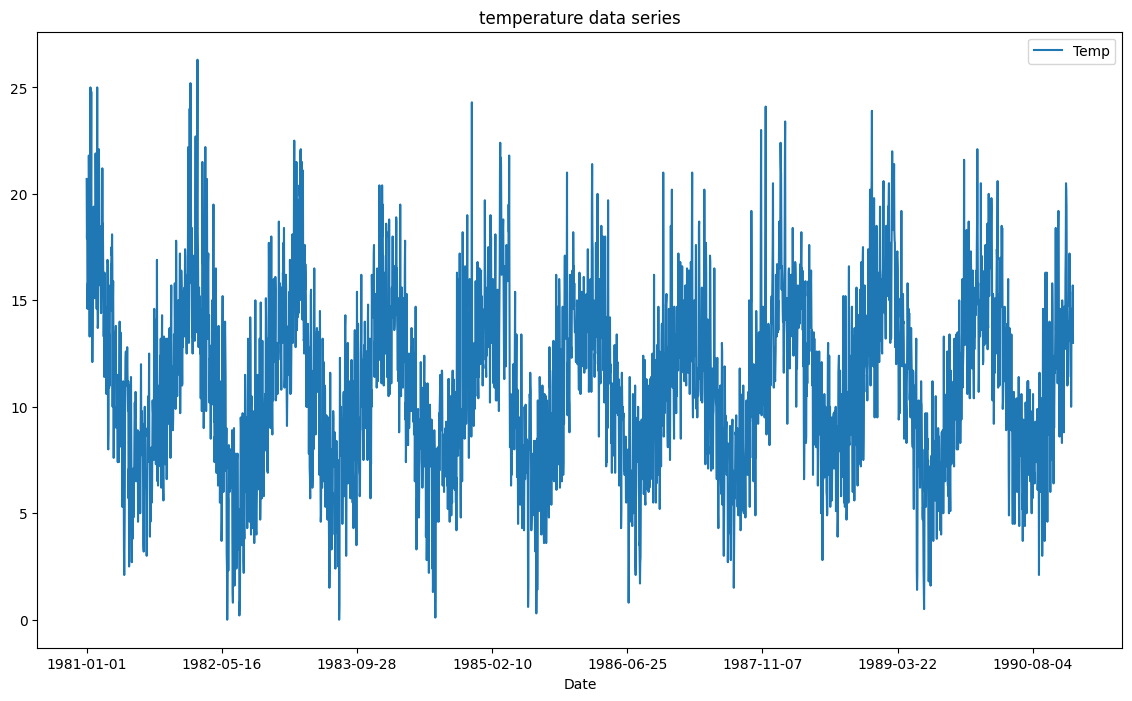

In [29]:
data.plot(figsize=(14,8), title='temperature data series')

In [30]:
series = data['Temp'].values
series

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

In [31]:
result = adfuller(series, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] > result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Stationary")

ADF Statistic: -4.444805
p-value: 0.000247
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Failed to Reject Ho - Time Series is Stationary
